

# Project: Investigate a No Show Medical Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>  In this project, I will be analyzing the data associated with 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.In particular, I will be insterested in finding trends that what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?




### Question(s) for Analysis
>  Are patients likely not to show up because they did not receive SMS?

>  Which gender type has the highest number of no-shows?

>  Which neighborhoods have the highest number of no_shows?

>  Whether or not the patient is enrolled in Brasilian welfare program can affect their decision of no_show?

>  Is the age distribution affect no show numbers?

### Data Wrangling
#### The steps are following as 
* Load in the data, check for cleanliness
* Trim and clean the dataset for analysis


In [15]:
# firtly import the libaries
import numpy as np
import pandas as pd 
import matplotlib as plt 
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline

In [3]:
# load and aquisite data
df=pd.read_csv('no_show_appointment.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# know the size of the dataset
df.shape

(110527, 14)

In [5]:
# check data distribution, find error data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# check data type and see if there is missing data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



## Data findings
*1.There are 13 independent variables and one dependent (No-show) in the dataset

*2.There is no missing data, but there has wrong data in Age column such as -1

*3.PatientID should not be float but int (however it is not relvent to my questions)

*4.Column name No-show should change to No_show


In [7]:
#removing wrong data in age, removing age above 100 because uncommon
df = df[(df['Age']>=0)&(df['Age']<=100)]
df.shape

(110519, 14)

In [8]:
#change column name No-show to No_show 
df.rename({'No-show':'No_show'}, axis=1, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#drop some columns that not relevant to my questions 
df.drop(['PatientId','AppointmentID','Hipertension','Diabetes','Alcoholism','Handcap'],axis=1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ba2ddea90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8ba2d3d940>]], dtype=object)

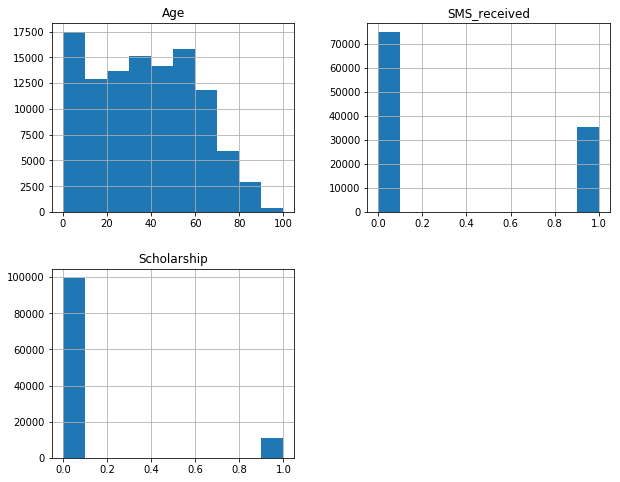

In [10]:
# Have a look of age,sms,scholarship distribution 
df.hist(figsize=(10,8))

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 Are patients likely not show up because they did not receive SMS?

In [11]:
# group by SMS_received,count shows and no shows number 
sms_trend = df.groupby('SMS_received').No_show.value_counts()
sms_trend

SMS_received  No_show
0             No         62506
              Yes        12532
1             No         25697
              Yes         9784
Name: No_show, dtype: int64

Text(0,0.5,'Number of appointments')

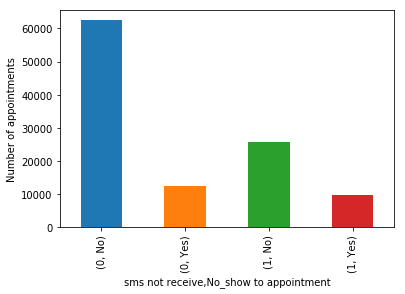

In [16]:
#plot the graph
sms_trend.plot(kind='bar')
plt.xlabel('sms not receive,no show to appointment')
plt.ylabel('Number of appointments')

#### According to this graph, we can see that most people showed up in appointment when they did not receive sms, which means sms is not the main factor of them obsent the appointment 



### Research Question 2 Which gender type has the highest number of No_show?

In [19]:
# groupby gender, count no shows and shows number 
gender_trend=df.groupby('Gender').No_show.value_counts()
gender_trend

Gender  No_show
F       No         57241
        Yes        14591
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

Text(0,0.5,'Number of appointment')

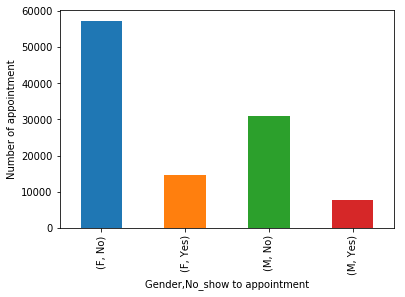

In [21]:
gender_trend.plot(kind='bar')
plt.xlabel('Gender,no show to appointment')
plt.ylabel('Number of appointment')

#### According to this graph, it is obviously that male has the highest number of no show in an appointment, female are more likely to show in the appointment, gender is an important factor contribute to whether patient attendent their appointment.

### Research Question 3: The top 10 neighbourhood has the highest number of No_show?

In [23]:
no_shows = df.query('No_show=="Yes"').groupby('Neighbourhood').No_show.count()
no_shows.sort_values(ascending=False, inplace=True)

Text(0,0.5,'Number of appointments')

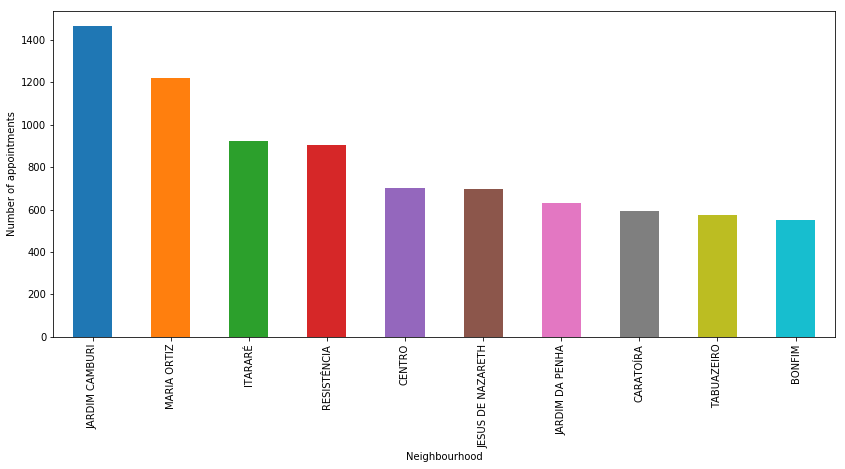

In [27]:
# Listing the top 10 neighbours which have the highest no show numbers
values= no_shows[:10]
values.plot(kind='bar',figsize=(14,6))
plt.xlabel('Neighbourhood')
plt.ylabel('Number of appointments')

### Research Question 4: Whether patient enroll in Brasillan welfare program can affect their no show in appointment?

In [28]:
scholarship_trend = df.groupby('Scholarship').No_show.value_counts()
scholarship_trend


Scholarship  No_show
0            No         79920
             Yes        19738
1            No          8283
             Yes         2578
Name: No_show, dtype: int64

Text(0,0.5,'number of appointments')

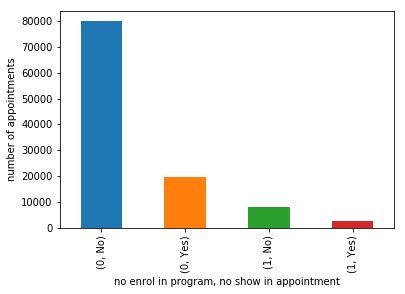

In [32]:
scholarship_trend.plot(kind='bar')
plt.xlabel('no enrol in program, no show in appointment')
plt.ylabel('number of appointments')

#### According to this graph, many patients not enrol in Brasillan welfare program but show in appointments, so the scholarship is not the key factor to decide their attendance of appointment

### Research Question 5 Is age distribution affect no show numbers?

In [34]:
# create age bins and cut age for age distribution 
age_bins=[0,20,40,60,80,100]
df['age_bins']= pd.cut(df.Age, age_bins)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,SMS_received,No_show,age_bins
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,0,No,"(60, 80]"
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,No,"(40, 60]"
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,No,"(60, 80]"
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,No,"(0, 20]"
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,No,"(40, 60]"


In [40]:
# filter no show appointment data group by age_bins 
no_show_age_distribution = df.query('No_show == "Yes"').groupby('age_bins').No_show.value_counts()
no_show_age_distribution


age_bins   No_show
(0, 20]    Yes        6457
(20, 40]   Yes        6626
(40, 60]   Yes        5591
(60, 80]   Yes        2537
(80, 100]  Yes         466
Name: No_show, dtype: int64

Text(0,0.5,'Number of appointment')

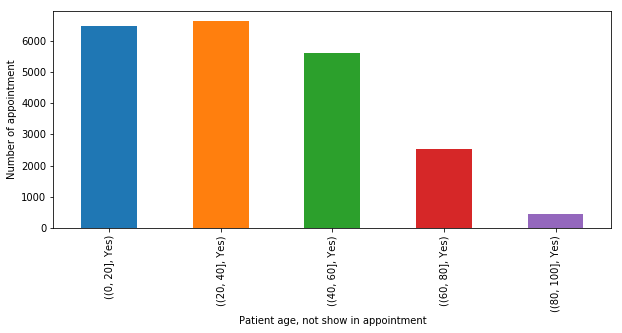

In [43]:
#plot a grph of No show with each age distribution 
no_show_age_distribution.plot(kind='bar', figsize=(10,4))
plt.xlabel('Patient age, not show in appointment')
plt.ylabel('Number of appointment')

#### According to this graph, it is clear that patient age between 0-40 are most likely not to show in appointment. People above 60 years old are more likely to show in appointment.

<a id='conclusions'></a>
## Conclusions

#### SMS received or not is not the main factor to affect patient show in the appointment because most of patients show in appointment without receiving SMS

#### Gender is an important factor affect the no show numbers, male has the highest number of not showing in an appointment.

#### Jardim camburi, Maria ortiz, Itarare, Resistencia, Centro, Jesus De nazareth, Caratoiza, Tabuazeiro, Bonfim are the top ten neighbours that have highest no show numbers in the dataset, more research need to be done to idenfity the reason, such as traffic issue, average income....

#### Scholarship is not the key factor to decide patients attendance of appointment

#### Age is an important factor to affect the number of people not showing in an appointment, people under 60 are more likey not to show in appointment, people age above 60 show in appointment more frequently, we can assume that they have better health awareness. 


### Limitations

#### There are serveral health disease in the dataset, which can be used to further identify the disease relationship with show decisions of patients. 

#### There are serval data quality problems have not been solved, many columns have been droped because they are not relevent to the questions. If more insight relationships need to be investigated, data quality need to be further improved such as data type of time, PatientID..

